In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('/content/sample_data/ds_salaries.csv')

Data Analysis

In [3]:
#print first 5 rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
#types of the data
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
# Selecting two columns and the first five rows
subset = df[['job_title', 'salary']].head(5)
# Display the subset
print(subset)

                  job_title  salary
0  Principal Data Scientist   80000
1               ML Engineer   30000
2               ML Engineer   25500
3            Data Scientist  175000
4            Data Scientist  120000


In [6]:
#amount of rows and columns in the data
df.shape

(3755, 11)

In [7]:
#statistical measurment of the data
df.describe(include = 'all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [8]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
#checking null values in the data
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
#rename the columns name
df.rename(columns={'experience_level':'Experience Level', 'employment_type':'Employment Type', 'job_title':'Job Title', 'salary_currency':'Salary Currency', 'employee_residence':'Residence', 'company_location':'Location', 'company_size':'Size','salary_in_usd':'Salary In USD', 'salary':'Salary','work_year':'Work Year'}, inplace = True)

In [11]:
#show first five rows
df.head()

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary In USD,Residence,remote_ratio,Location,Size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [12]:
#show the types of data in each column
df.dtypes

Work Year            int64
Experience Level    object
Employment Type     object
Job Title           object
Salary               int64
Salary Currency     object
Salary In USD        int64
Residence           object
remote_ratio         int64
Location            object
Size                object
dtype: object

Data Visualization

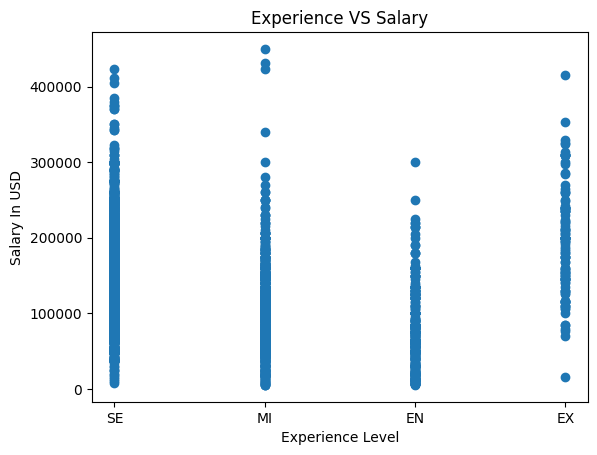

In [13]:
# Scatter plot
plt.scatter(df['Experience Level'], df['Salary In USD'])
plt.xlabel('Experience Level')
plt.ylabel('Salary In USD')
plt.title('Experience VS Salary')
plt.show()

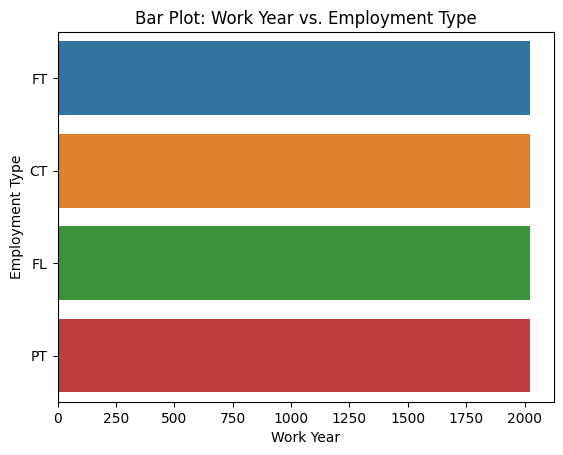

In [14]:
# Bar plot
sns.barplot(x='Work Year', y='Employment Type', data=df)
plt.xlabel('Work Year')
plt.ylabel('Employment Type')
plt.title('Bar Plot: Work Year vs. Employment Type')
plt.show()

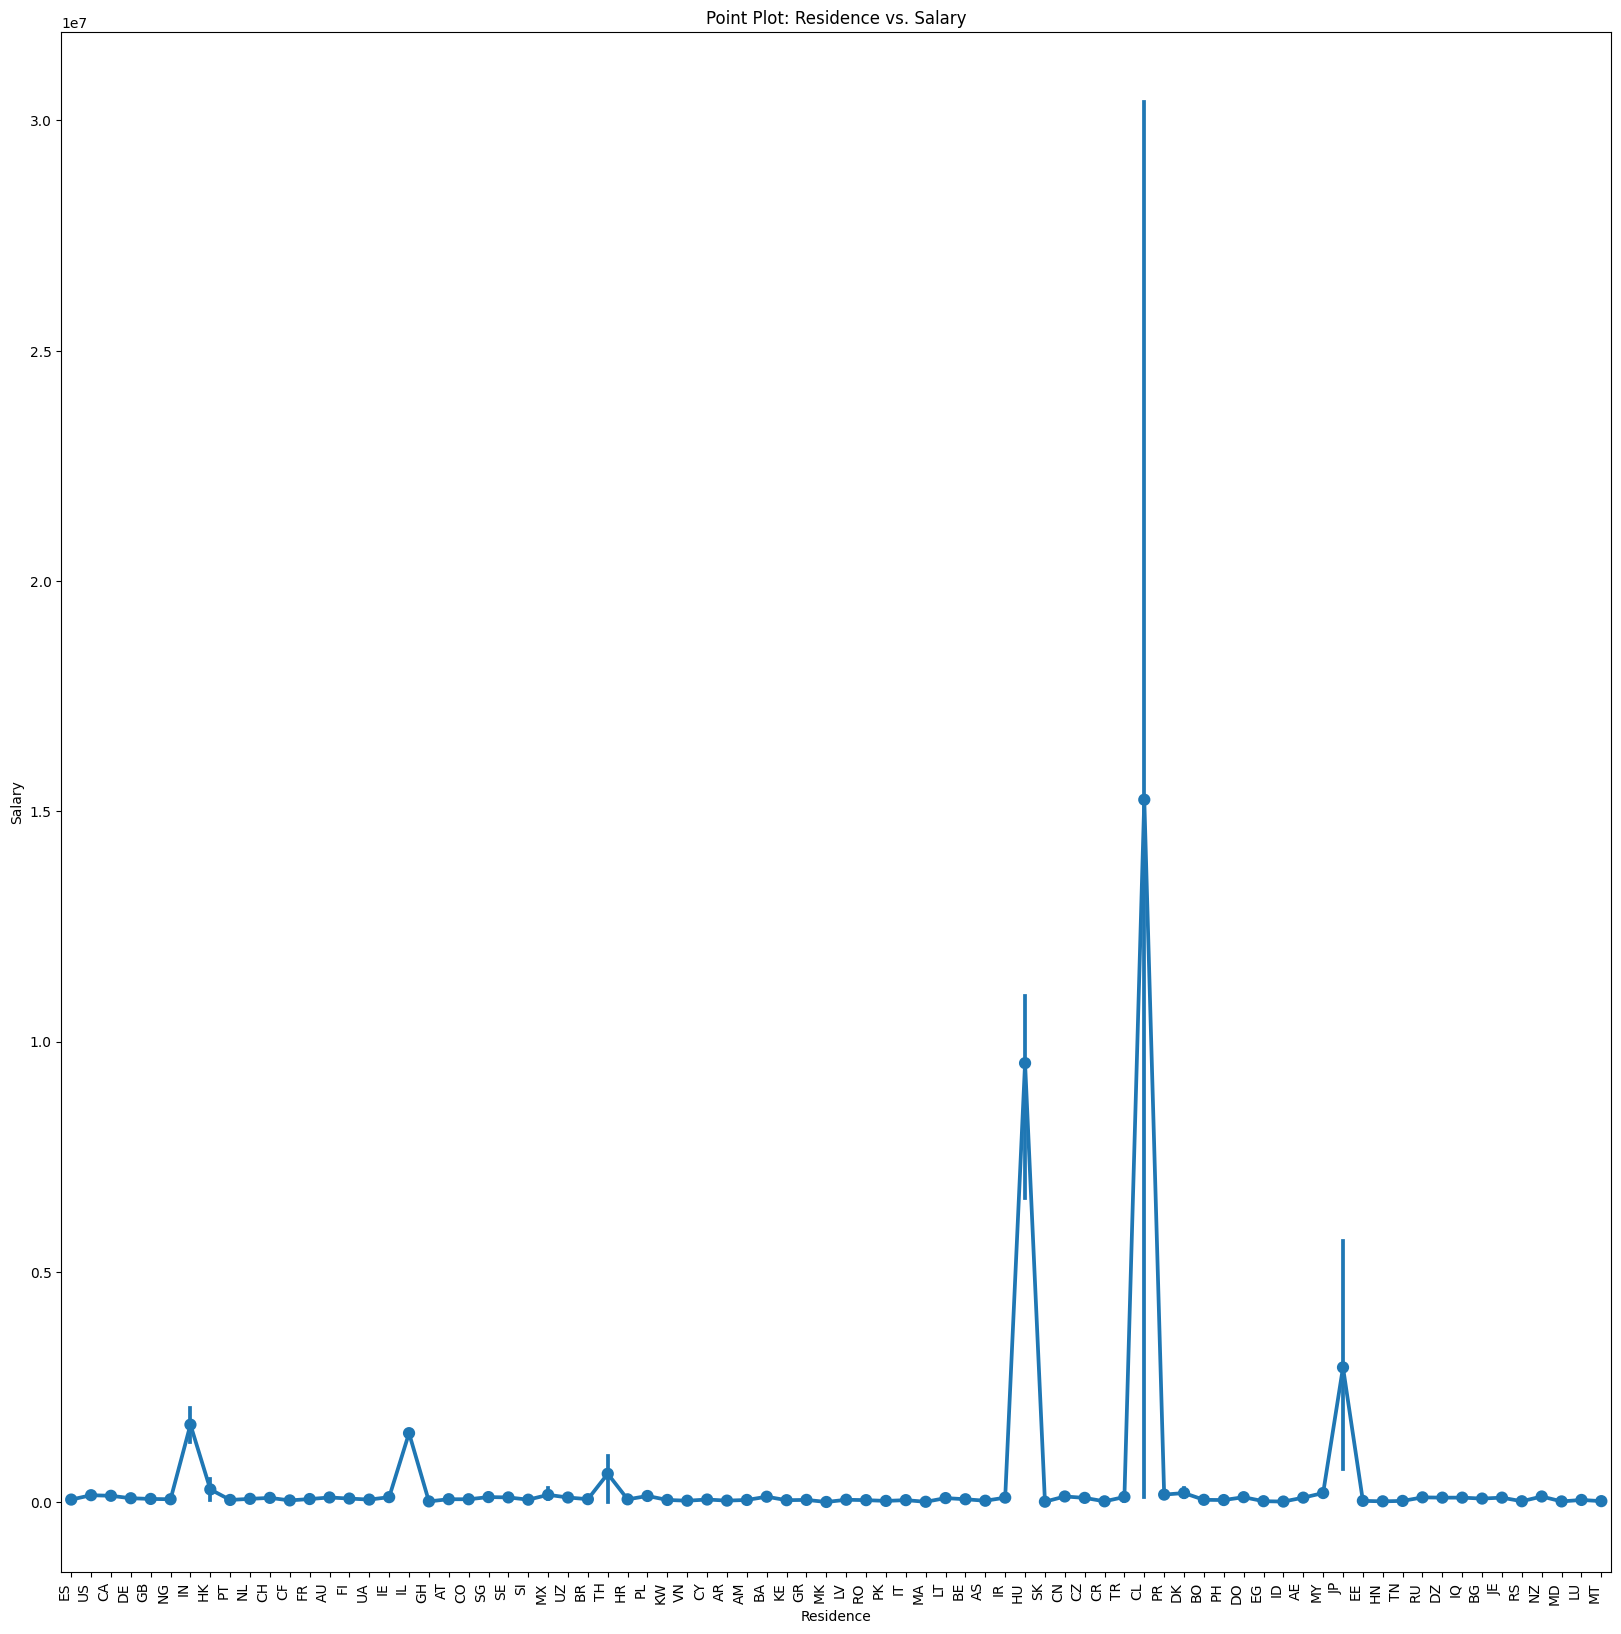

In [15]:
# Point plot
plt.figure(figsize=(20, 20))  # Set the figure size
sns.pointplot(x='Residence', y='Salary', data=df)
plt.xlabel('Residence')
plt.ylabel('Salary')
plt.title('Point Plot: Residence vs. Salary')
plt.xticks(rotation=90, ha='right')  # Rotate and align the x-axis labels
plt.show()

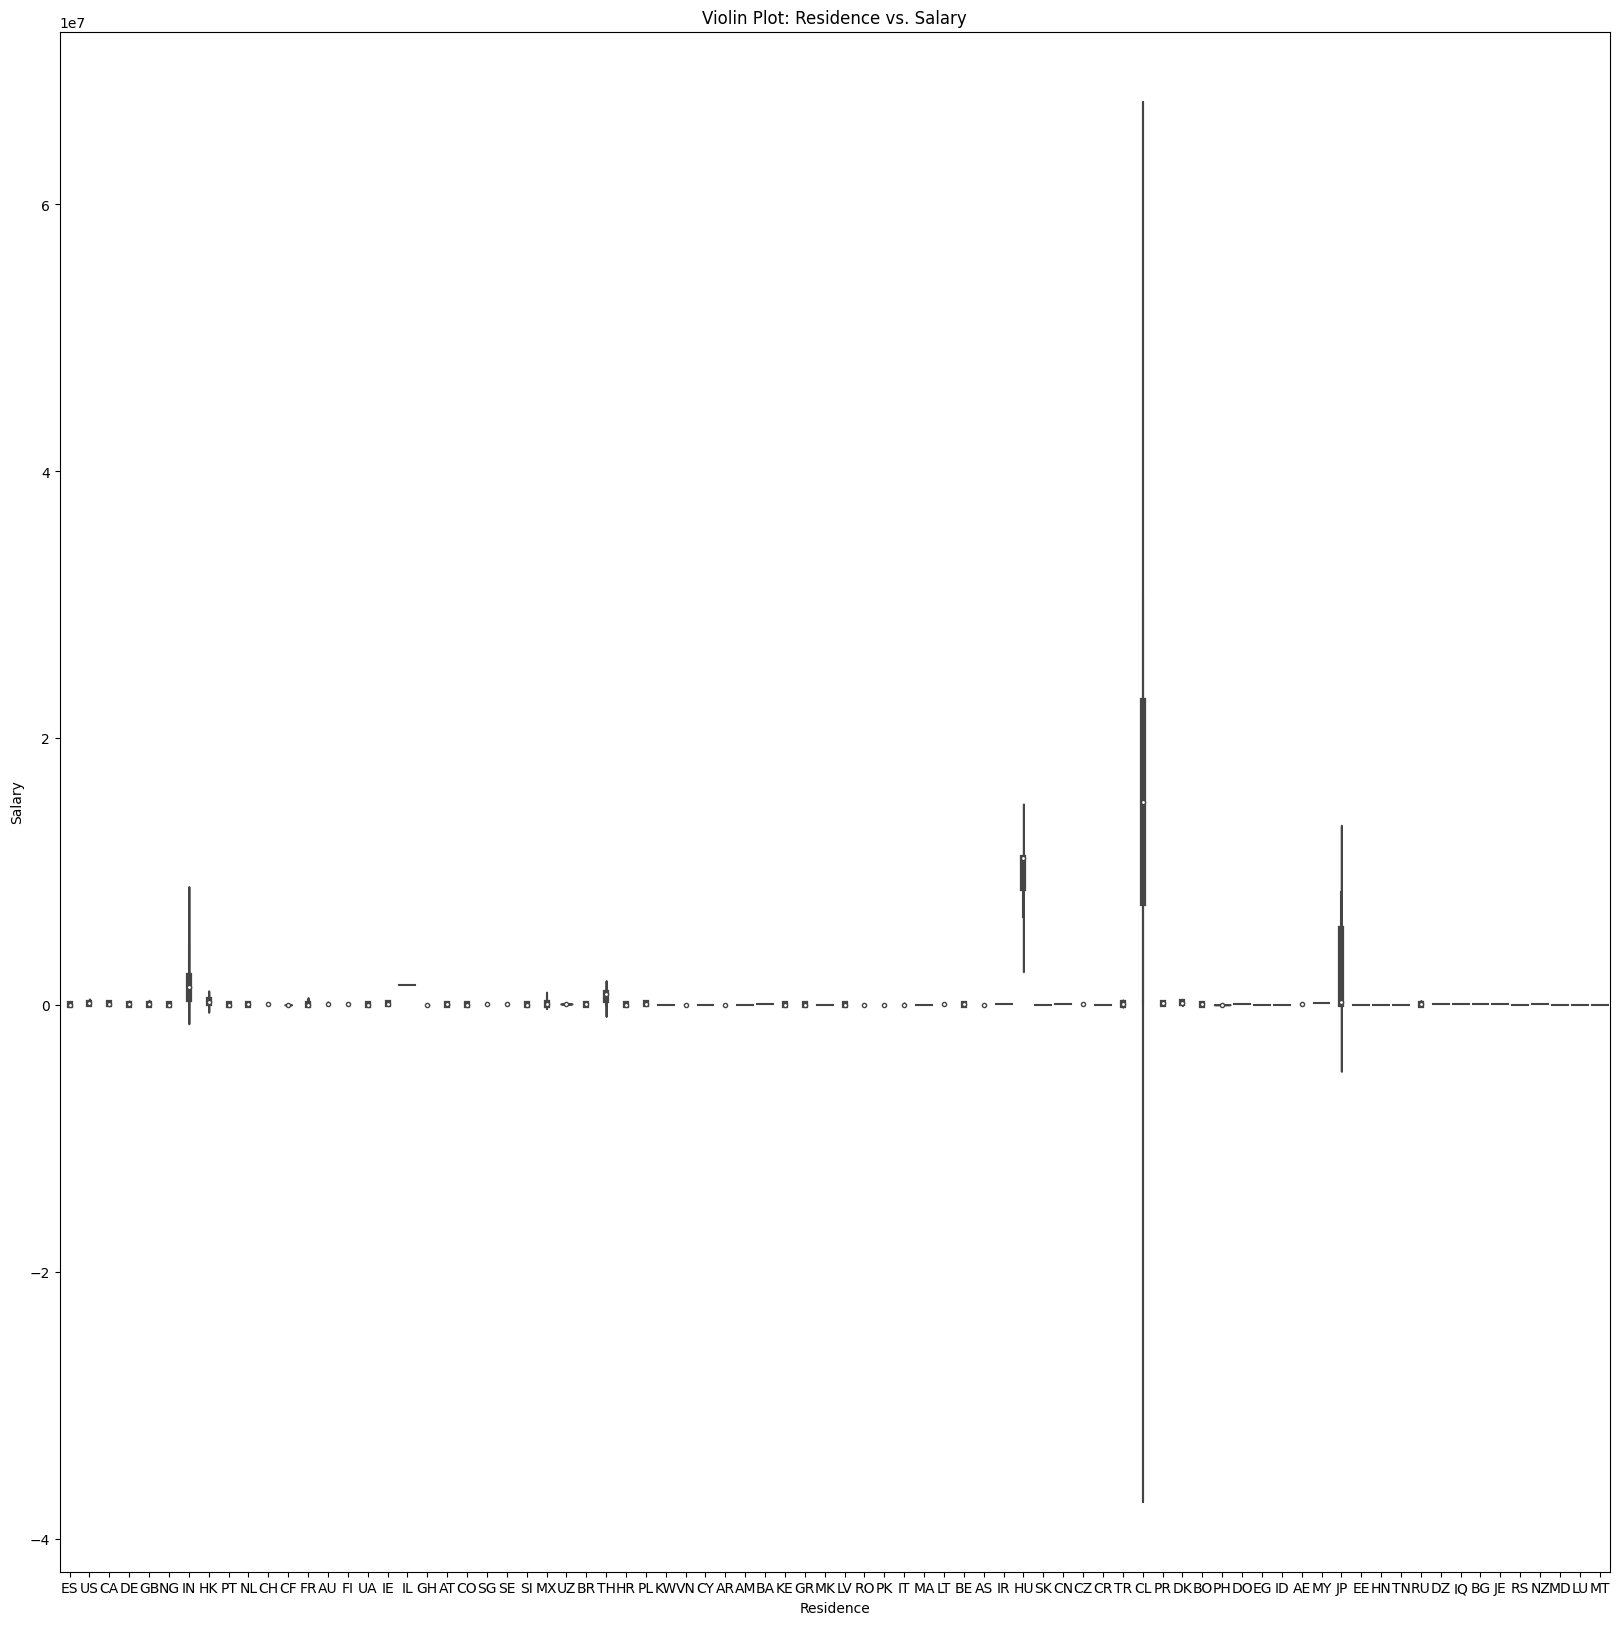

In [16]:
# Violin plot
plt.figure(figsize=(20, 20))  # Set the figure size
sns.violinplot(x='Residence', y='Salary', data=df)
plt.xlabel('Residence')
plt.ylabel('Salary')
plt.title('Violin Plot: Residence vs. Salary')
plt.show()

<ipython-input-17-31351b2d2b1d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heatmap_data.corr()


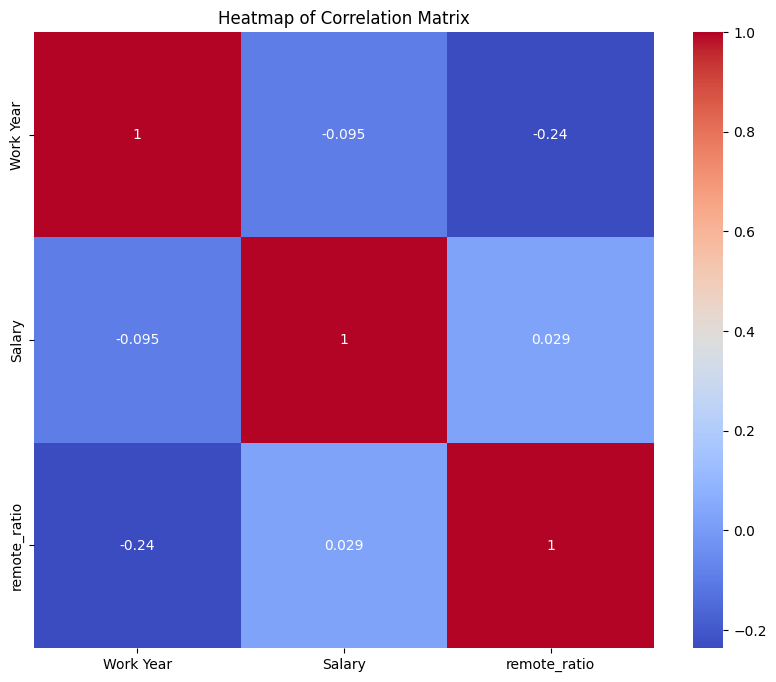

In [17]:
#heat map
# Select relevant columns for the heatmap
heatmap_data = df[['Work Year', 'Experience Level', 'Employment Type', 'Job Title', 'Salary', 'remote_ratio']]

# Calculate correlation matrix
corr_matrix = heatmap_data.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Encoding the Data

In [18]:
# List of columns to be label encoded
columns_to_encode = ['Experience Level', 'Employment Type', 'Job Title', 'Salary Currency', 'Residence', 'Location', 'Size']

# Apply label encoding to each column
label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df)

      Work Year  Experience Level  Employment Type  Job Title   Salary  \
0          2023                 3                2         84    80000   
1          2023                 2                0         66    30000   
2          2023                 2                0         66    25500   
3          2023                 3                2         47   175000   
4          2023                 3                2         47   120000   
...         ...               ...              ...        ...      ...   
3750       2020                 3                2         47   412000   
3751       2021                 2                2         84   151000   
3752       2020                 0                2         47   105000   
3753       2020                 0                0         17   100000   
3754       2021                 3                2         45  7000000   

      Salary Currency  Salary In USD  Residence  remote_ratio  Location  Size  
0                   7          

In [19]:
#columns types
df.dtypes

Work Year           int64
Experience Level    int64
Employment Type     int64
Job Title           int64
Salary              int64
Salary Currency     int64
Salary In USD       int64
Residence           int64
remote_ratio        int64
Location            int64
Size                int64
dtype: object

Find Correlation Between Data

In [20]:
# Calculate correlation matrix
correlation_matrix = df[['Experience Level', 'Employment Type', 'Job Title', 'Salary Currency', 'Residence', 'Location', 'Size']].corr()

print(correlation_matrix)

                  Experience Level  Employment Type  Job Title  \
Experience Level          1.000000        -0.032794   0.020026   
Employment Type          -0.032794         1.000000  -0.052231   
Job Title                 0.020026        -0.052231   1.000000   
Salary Currency           0.225464        -0.048446  -0.057072   
Residence                 0.251325        -0.024582  -0.063911   
Location                  0.250591        -0.013963  -0.073549   
Size                      0.066414        -0.041001   0.002548   

                  Salary Currency  Residence  Location      Size  
Experience Level         0.225464   0.251325  0.250591  0.066414  
Employment Type         -0.048446  -0.024582 -0.013963 -0.041001  
Job Title               -0.057072  -0.063911 -0.073549  0.002548  
Salary Currency          1.000000   0.755836  0.764744  0.102738  
Residence                0.755836   1.000000  0.945676  0.032168  
Location                 0.764744   0.945676  1.000000  0.041703  
Si

In [21]:
# Calculate correlation matrix using Pearson correlation coefficient
correlation_matrix = df.corr()

print(correlation_matrix)

                  Work Year  Experience Level  Employment Type  Job Title  \
Work Year          1.000000          0.187748         0.011127  -0.026862   
Experience Level   0.187748          1.000000        -0.032794   0.020026   
Employment Type    0.011127         -0.032794         1.000000  -0.052231   
Job Title         -0.026862          0.020026        -0.052231   1.000000   
Salary            -0.094724         -0.024884        -0.003908   0.039065   
Salary Currency    0.254548          0.225464        -0.048446  -0.057072   
Salary In USD      0.228290          0.327173        -0.010329   0.120875   
Residence          0.243475          0.251325        -0.024582  -0.063911   
remote_ratio      -0.236430         -0.054025        -0.028673  -0.042451   
Location           0.234661          0.250591        -0.013963  -0.073549   
Size               0.138875          0.066414        -0.041001   0.002548   

                    Salary  Salary Currency  Salary In USD  Residence  \
Wo

In [22]:
# Perform chi-squared test for multiple columns
_, p_value, _, _ = chi2_contingency(df)

print("p-value:", p_value)

p-value: 0.0


In [23]:
# Calculate Pearson correlation coefficient
pearson_corr = df['Experience Level'].corr(df['Salary'])

print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: -0.024883570448042486


In [24]:
# Perform chi-squared test
contingency_table = pd.crosstab(df['Experience Level'], df['Salary'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared statistic:", chi2)
print("p-value:", p_value)

Chi-Squared statistic: 4334.91930021839
p-value: 2.7622213065191063e-109


Multiple Linear Regression

In [25]:
lm = LinearRegression()

In [26]:
# Select the columns for X and Y
X = df[['Experience Level', 'Employment Type', 'Job Title', 'Salary Currency']]
Y = df['Salary']

# Fit the linear regression model
lm.fit(X, Y)

# Predict the target variable
Yhat = lm.predict(X)

Polynominal Regression and Pipeline

In [27]:
# Print the column names
column_names = df.columns
print(column_names)

Index(['Work Year', 'Experience Level', 'Employment Type', 'Job Title',
       'Salary', 'Salary Currency', 'Salary In USD', 'Residence',
       'remote_ratio', 'Location', 'Size'],
      dtype='object')


In [28]:
# Select the features and target variable
X = df[['Work Year', 'Experience Level', 'Salary In USD', 'Residence',
       'remote_ratio', 'Location', 'Size']]
y = df['Salary']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Define the pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [48]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [49]:
# Make predictions on the test and train data
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [50]:
# Calculate MSE for test and train data
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print("MSE (Test Data):", mse_test)
print("MSE (Train Data):", mse_train)

MSE (Test Data): 151033626465.93796
MSE (Train Data): 499602352214.6657


Model Evaluation

(0.0, 31919700.0)

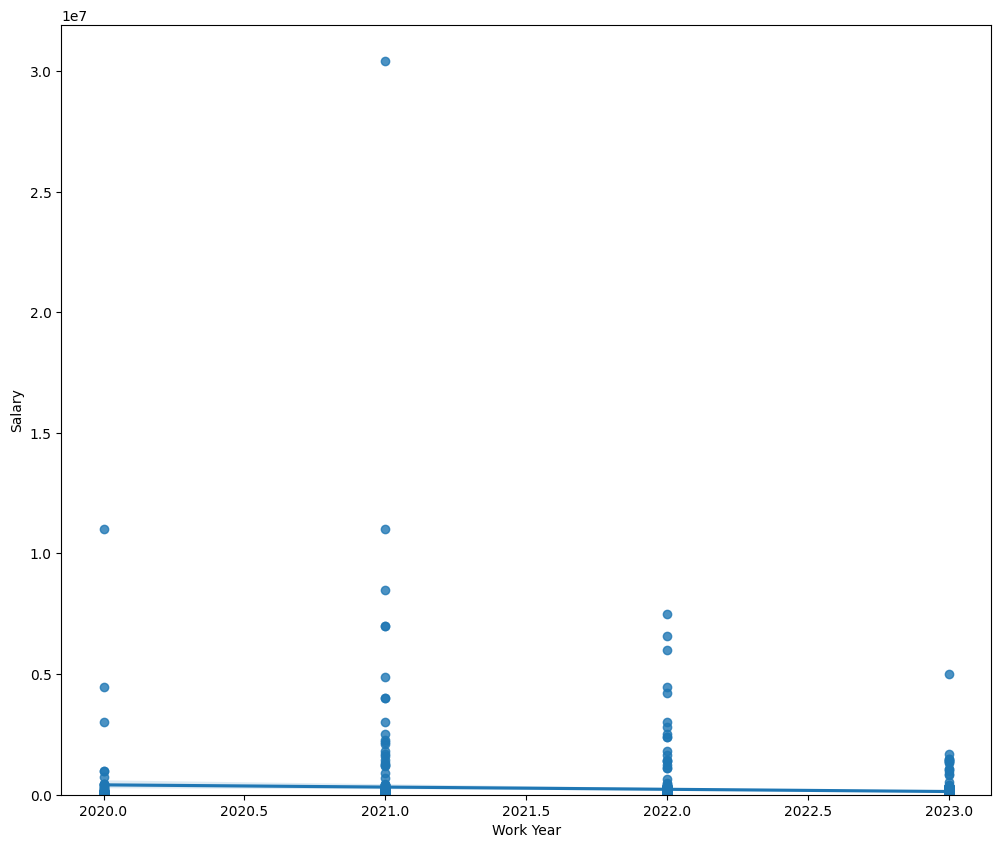

In [31]:
#Regression Plot
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x = 'Work Year', y = 'Salary', data = df)
plt.ylim(0,)

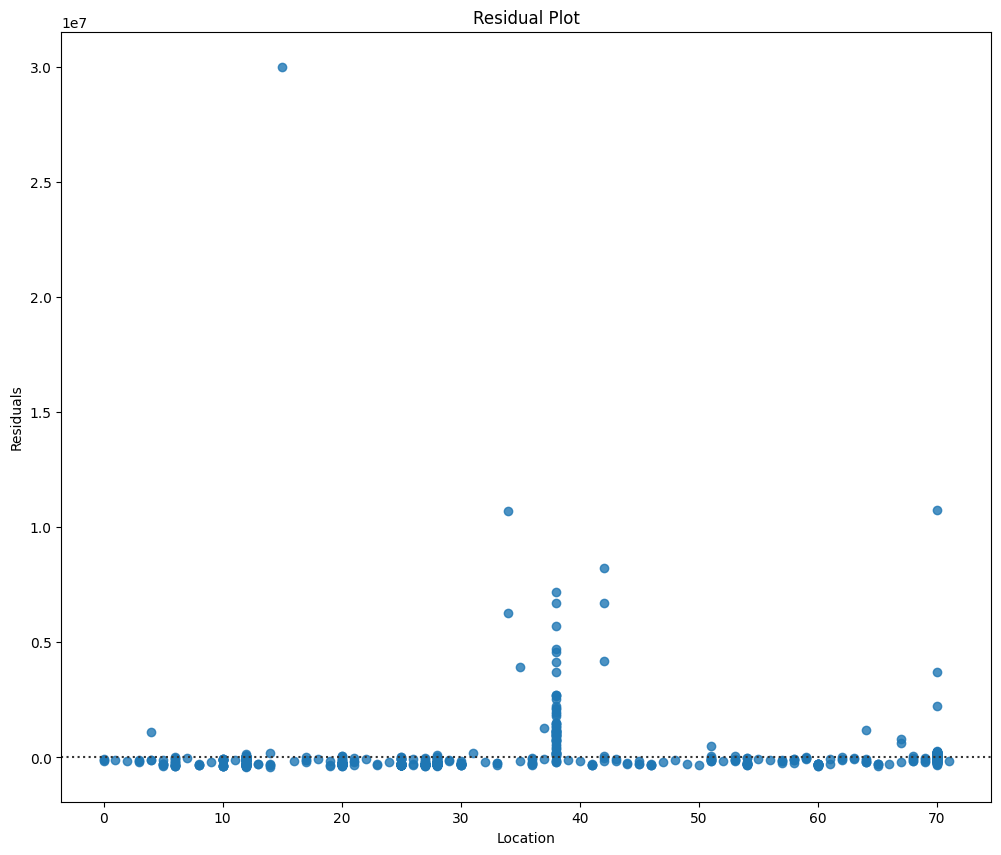

In [32]:
# Calculate the residuals
residuals = Y - Yhat

# Create a residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['Location'], y=residuals)
plt.xlabel('Location')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [33]:
#calculate the error
error = mean_squared_error(df['Salary'], Yhat)
print('The Mean Squared Error is:',error)

The Mean Squared Error is: 446731589103.8462


In [34]:
X = df[['Work Year', 'Experience Level', 'Employment Type', 'Job Title', 'remote_ratio', 'Residence', 'Size']]
y = df['Salary']
lm.fit(X,y)
lm.score(X,y)

0.022390723897750098

Model Splitting

In [35]:
# Select the columns for X and Y
X = df[['Experience Level', 'Employment Type', 'Job Title', 'Salary Currency', 'Salary In USD']]
y = df['Salary']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
#show the size of the data
print(X.shape, X_train.shape, X_test.shape)

(3755, 5) (2628, 5) (1127, 5)


In [38]:
#cross validation
model = LinearRegression()
yhat = cross_val_score(model, X, y, cv=3)

Overfitting, Underfitting & Model Selection

In [39]:
#calculate different R-Squared
r_squre_test = []
order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree = n)

  X_train_pr = pr.fit_transform(X_train[['Experience Level']])
  X_test_pr = pr.fit_transform(X_test[['Salary In USD']])

  model.fit(X_train_pr, y_train)
  r_squre_test.append(model.score(X_test_pr, y_test))

print(r_squre_test)

[-84544697.121051, -5.89190843720933e+18, -3.0696292323326564e+28, -2.8540407692724534e+62]


Ridge Regression

In [40]:
# Select the columns for X and Y
X = df[['Experience Level', 'Employment Type', 'Job Title', 'Salary Currency', 'Salary In USD']]
y = df['Salary']

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)

In [43]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)

In [44]:
print("Linear Regression RMSE:", linear_rmse)
print("Ridge Regression RMSE:", ridge_rmse)

Linear Regression RMSE: 405254.57024647924
Ridge Regression RMSE: 405254.54853477824


In [45]:
# Define a list of alpha values to try
alpha_values = [0.1, 0.5, 1.0, 5.0, 10.0]

# Iterate over alpha values
for alpha in alpha_values:
    # Create and fit the Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Alpha =", alpha)
    print("MSE:", mse)
    print()

Alpha = 0.1
MSE: 164231249108.12692

Alpha = 0.5
MSE: 164231179030.24976

Alpha = 1.0
MSE: 164231092123.95087

Alpha = 5.0
MSE: 164230422431.54208

Alpha = 10.0
MSE: 164229640531.173



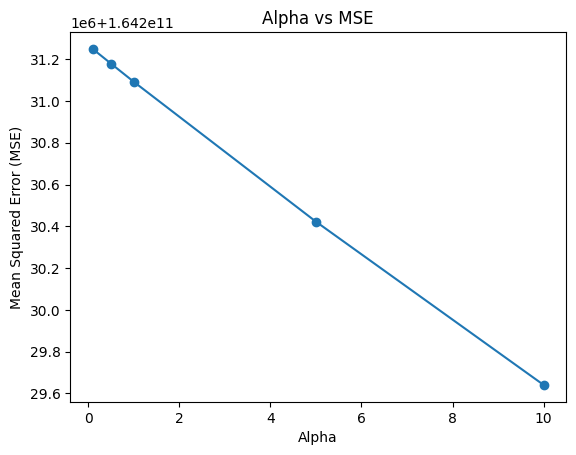

In [46]:
alpha_values = [0.1, 0.5, 1.0, 5.0, 10.0]
mse_values = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(alpha_values, mse_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alpha vs MSE')
plt.show()

Grid Search

In [51]:
# Select the columns for X and Y
X = df[['Experience Level', 'Employment Type', 'Job Title', 'Salary Currency', 'Salary In USD']]
y = df['Salary']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Define the Ridge regression model
ridge_model = Ridge()

In [54]:
# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

In [57]:
# Create the grid search object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)

In [58]:
# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]})

In [59]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
print(best_model)

Ridge(alpha=10.0)


In [60]:
# Make predictions on the training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [61]:
# Calculate the MSE for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Training MSE: 517389755794.8555
Testing MSE: 164229640531.173
